In [2]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x


In [3]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [6]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x


In [7]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [8]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [12]:
x.sort
print(x)

[1 2 3 4 5]


In [13]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [14]:
x[i]

array([1, 2, 3, 4, 5])

In [15]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [16]:
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [18]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [19]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [20]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [21]:
X = rand.rand(10, 2)

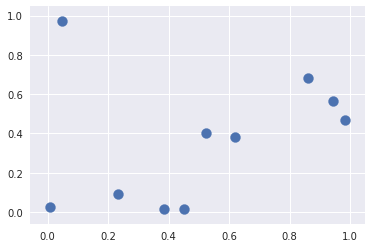

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100);

In [24]:
X

array([[ 0.00706631,  0.02306243],
       [ 0.52477466,  0.39986097],
       [ 0.04666566,  0.97375552],
       [ 0.23277134,  0.09060643],
       [ 0.61838601,  0.38246199],
       [ 0.98323089,  0.46676289],
       [ 0.85994041,  0.68030754],
       [ 0.45049925,  0.01326496],
       [ 0.94220176,  0.56328822],
       [ 0.3854165 ,  0.01596625]])

In [33]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [29]:
print(X[:,np.newaxis,:].shape)
X[:,np.newaxis,:]

(10, 1, 2)


array([[[ 0.00706631,  0.02306243]],

       [[ 0.52477466,  0.39986097]],

       [[ 0.04666566,  0.97375552]],

       [[ 0.23277134,  0.09060643]],

       [[ 0.61838601,  0.38246199]],

       [[ 0.98323089,  0.46676289]],

       [[ 0.85994041,  0.68030754]],

       [[ 0.45049925,  0.01326496]],

       [[ 0.94220176,  0.56328822]],

       [[ 0.3854165 ,  0.01596625]]])

In [31]:
print(X[np.newaxis,:,:].shape)
X[np.newaxis,:,:]

(1, 10, 2)


array([[[ 0.00706631,  0.02306243],
        [ 0.52477466,  0.39986097],
        [ 0.04666566,  0.97375552],
        [ 0.23277134,  0.09060643],
        [ 0.61838601,  0.38246199],
        [ 0.98323089,  0.46676289],
        [ 0.85994041,  0.68030754],
        [ 0.45049925,  0.01326496],
        [ 0.94220176,  0.56328822],
        [ 0.3854165 ,  0.01596625]]])

In [35]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [37]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [38]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [39]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [42]:
nearest = np.argsort(dist_sq, axis=1)

In [43]:
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]])

In [44]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

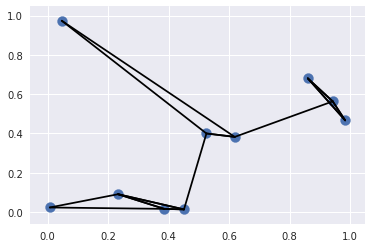

In [46]:
plt.scatter(X[:, 0], X[:,1], s=100)

K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')